In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt

# basic functions

def nCr(n,r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)

def catTriangle(w,l):
    return int(math.factorial(w+l)*(w+-l+1)/(math.factorial(l)*math.factorial(w+1)))

def catTrapezoid(w,l,m):
    if 0 <= l < m:
        return nCr(w + l, l)
    elif m <= l <= w + m -1:
        return nCr(w+l,l) - nCr(w+l,l-m)
    else:
        return 0

dp = {}
def catTrapezoidWeighted(w,l,m,a,b):
    f = (w,l,m,a,b)
    if f in dp:
        return dp[f]
    if l == 0:
        return 1
    elif b*l >= a*w + m:
        return 0
    elif w == 0:
        return 1
    else:
        val = catTrapezoidWeighted(w-1,l,m,a,b) + catTrapezoidWeighted(w,l-1,m,a,b)
        dp[f] = val
        return dp[f]
    
dp2 = {}
def catTrapezoidWeightedInverse(x,w,l,p,q,c):
#     print('at',x,w,l,p,q,c)
    f = (x,w,l,p,q,c)
    if f in dp2:
        return dp2[f]
    if l == 0:
        return 1
    else:
        x_new = x_update(x,w,l,p,q)
#         print(x_new, local_reward(x_new,p,q,c))
        if local_reward(x_new,p,q,c) < 0:
            dp2[f] = 0
            return dp2[f]
        elif w == 0:
            return 1
        else:
            val = catTrapezoidWeightedInverse(x,w-1,l,p,q,c) + catTrapezoidWeightedInverse(x,w,l-1,p,q,c)
            dp2[f] = val
            return dp2[f]
        
def update_prior(x,p,q,result):
    if result == True:
        return p*x/(win(x,p,q))
    else:
        return (1 - p)*x/(lose(x,p,q))

def prior_inverse(x,p,q,result):
    if result == True:
        return x*q/(p - x*p + x*q)
    else:
        return x*(1-q)/( (1-p) - x*(1-p) + x*(1-q))

def local_reward(x,p,q,c):
    out = win(x,p,q) - c
    return out

def win(x,p,q):
    return x*p + (1-x)*q

def lose(x,p,q):
    return x*(1-p) + (1-x)*(1-q)

def x_update(x,w,l,p,q):
    return  (x*p**w*(1-p)**l)/(x*p**w*(1-p)**l + (1-x)*q**w*(1-q)**l)

def expected_profit(x,p,q,c,c2,delta,rounds=100):
    
    # begin: assume c > c2. and that local_reward(x,p,q) > c
    if c < c2:
        return 0
    
    tot = 0
    
    # first, get possible losses
    possibleLosses = 0
    x_new = x
#     print(local_reward(x_new,p,q,c))
#     while local_reward(x_new,p,q,c) > 0 and possibleLosses < 40:
#         possibleLosses += 1
#         x_new = update_prior(x_new,p,q,False)
#     print('I can lose', possibleLosses)
    
    for t in range(rounds):
        lowest = max(0,int((t-possibleLosses+1)/2))
            
        for w in range(lowest,t + 1,1):
            l = t - w
#             print('\n---\n',t,w,l)
#             print('cat',catTrapezoid(w,l,possibleLosses),prob_reach(x,w,l,p,q))
            add = delta**t*(c - c2)*catTrapezoid(w,l,possibleLosses+1)*prob_reach(x,w,l,p,q)
#             print('add', catTrapezoid(w,l,possibleLosses+1),prob_reach(x,w,l,p,q),add)
            tot += add
    return tot

def expected_profit_weighted(x,p,q,c,c2,delta,rounds=100):
    
    # begin: assume c > c2. and that local_reward(x,p,q) > c
    if c < c2:
        return 0
    
    tot = 0

    for t in range(rounds):
        lowest = 0
            
        for w in range(lowest,t + 1,1):
            l = t - w
            print('\n---\n',t,w,l, catTrapezoidWeightedInverse(x,w,l,p,q,c))
#             print('cat',catTrapezoid(w,l,possibleLosses),prob_reach(x,w,l,p,q))
            add = delta**t*(c - c2)*catTrapezoidWeightedInverse(x,w,l,p,q,c)*prob_reach(x,w,l,p,q)
#             print('add', catTrapezoid(w,l,possibleLosses+1),prob_reach(x,w,l,p,q),add)
            tot += add
    return tot

def prob_reach(x,w,l,p,q):
    prob = 1
    for i in range(w):
        prob *= win(x,p,q)
        x = update_prior(x,p,q,True)
    for i in range(l):
        prob *= lose(x,p,q)
        x = update_prior(x,p,q,False)
    return prob

def getPossibleCX(x,p,q,c):
    # todo: add c2
    # returns the possible static prices such that local reward > 0
    if local_reward(x,p,q,c) < 0:
        return []
    elif x == 1:
        return []
    else:
        kList = []
        possible = True
        k = 0
        while possible: # todo if c < q then forever
            if local_reward(x,p,q,c) <= 0 or k > 30:
                possible = False
            k += 1
            c2 = win(x,p,q)
            kList.append(c2)
#             print(c2, k)
            x = update_prior(x,p,q,False)
        return kList

In [45]:
x = 0.5
w = 2
l = 1
p = 0.7
q = 0.4
c = 0.51
c2 = 0.32
delta = 0.9

x = update_prior(0.5, 0.7, 0.4, False)
update_prior(x, 0.7, 0.4, False)

print(catTrapezoidWeightedInverse(x,w,l,p,q,c))

expected_profit_weighted(x,p,q,c,c2,delta,rounds=5)

1

---
 0 0 0 1

---
 1 0 1 0

---
 1 1 0 1

---
 2 0 2 0

---
 2 1 1 0

---
 2 2 0 1

---
 3 0 3 0

---
 3 1 2 0

---
 3 2 1 1

---
 3 3 0 1

---
 4 0 4 0

---
 4 1 3 0

---
 4 2 2 0

---
 4 3 1 2

---
 4 4 0 1


0.38148923710000004

In [6]:
w = 3
l = 1
m = 1
a = 1
b = 3
print(catTrapezoidWeighted(w,l,m,a,b))
# catTrapezoid(w,l,m)

1


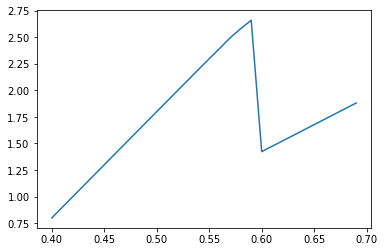

In [3]:
x = 0.99
p = 0.6
q = 0.4
# c = 0.40001
c2 = 0.32
delta = 0.9

# plot
# prices = getPossibleCX(x,p,q,c2)
prices = [0.4 + 0.01*i for i in range(30)]
profits = []
for i in range(len(prices)):
#     print(i,expected_profit(x,p,q,prices[i],c2,delta,100))
    profits.append(expected_profit(x,p,q,prices[i],c2,delta,100))
    
import matplotlib.pyplot as plt
print(plt.plot(prices,profits))

[0.598, 0.5970149253731344, 0.5955555555555555, 0.5934065934065933, 0.5902702702702701, 0.5857519788918204, 0.5793630573248406, 0.5705632949727435, 0.5588716502115653, 0.544059342626934, 0.5263842917251048, 0.5067399493023141, 0.48655876278756977, 0.46743421175713407, 0.45064854952821876, 0.4368787955213166, 0.42619599136243336, 0.41826128153034886, 0.4125563459680922, 0.4085498215067348, 0.4057822767276972, 0.40389236234547476, 0.4026118520210812, 0.40174884756580304, 0.40116930660889644, 0.4007810599034427, 0.40052138532424686, 0.4003478925262605, 0.40023206290575797, 0.40015476846387105, 0.40010320559753365, 0.40006881556860896]


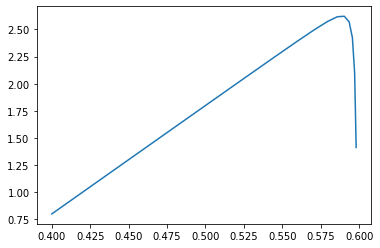

In [4]:
prices = getPossibleCX(x,p,q,c2)
# prices = [0.4 + 0.01*i for i in range(30)]
print(prices)
profits = []
for i in range(len(prices)):
#     print(i,expected_profit(x,p,q,prices[i],c2,delta,100))
    profits.append(expected_profit(x,p,q,prices[i],c2,delta,100))

print(plt.plot(prices,profits))